# Name : Prasad Rangrao Shelar
# Roll no. : 230340325037
# *******************************************************************************************

# Importing All Necessary libraries.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading and EDA.

In [114]:
df = pd.read_csv("Fraud.csv")
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [115]:
df.shape

(6362620, 11)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [117]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Check for null values

In [118]:
df.isnull().values.any()

False

### Checking of Data Imbalance

In [119]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.2f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.2f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.87 %
Percentage of Fraud transactions: 0.13 %


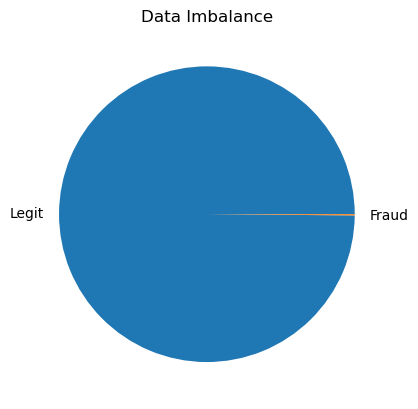

In [120]:
plt.title("Data Imbalance")
plt.pie([legit,fraud],labels=["Legit","Fraud"])
plt.show()

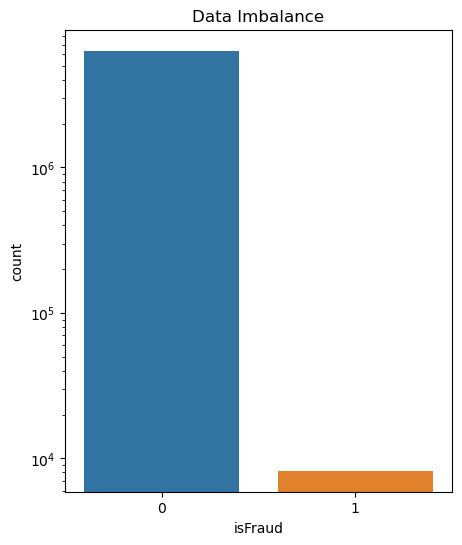

In [121]:
plt.figure(figsize=(5,6))
plt.title("Data Imbalance")
sns.countplot(x = df.isFraud)
plt.yscale('log')
plt.show()

#### These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR IMBALANCED DATA.

### CORRELATION HEATMAP

<Axes: >

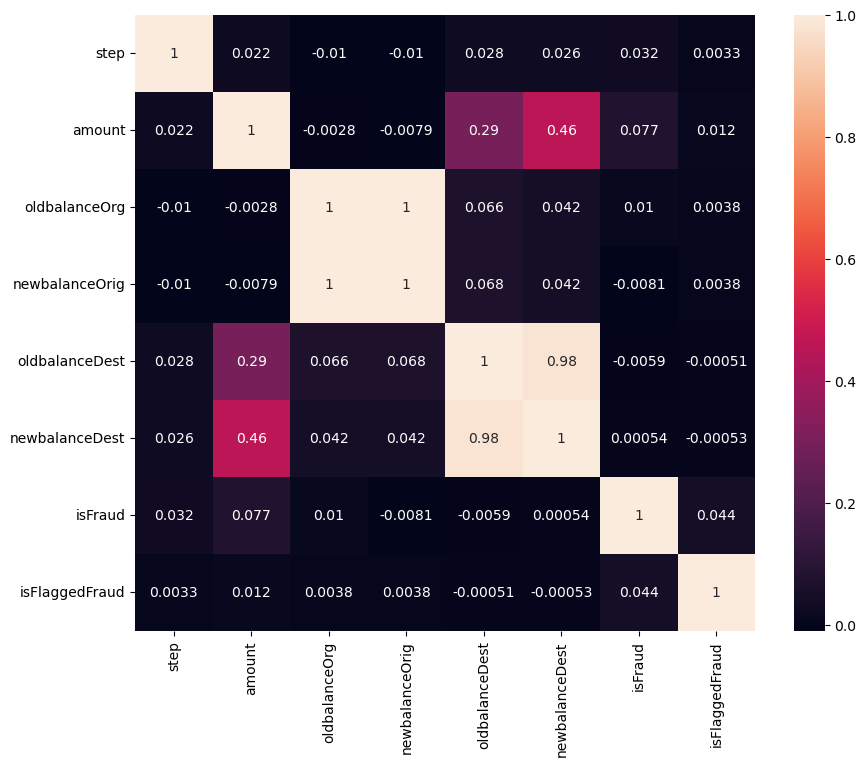

In [122]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#### As we see in the heatmap above there is very high correlation between (oldbalanceOrg and newbalanceOrig) and (oldbalanceDest and newbalanceDest) we need to take appropriate action on them.

### Plotting countplot.

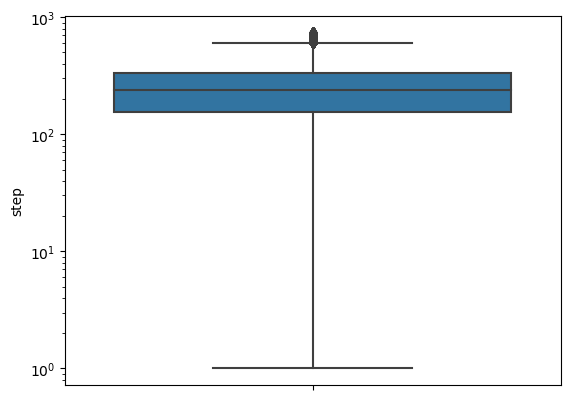

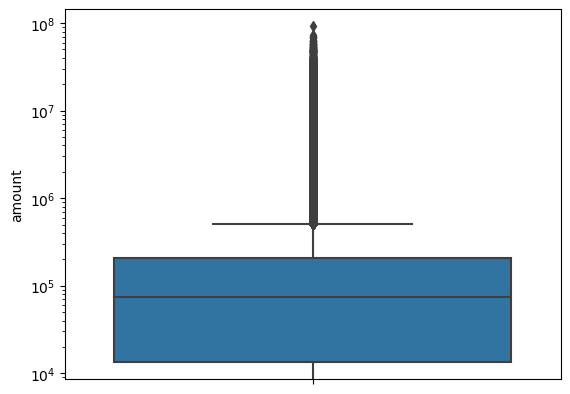

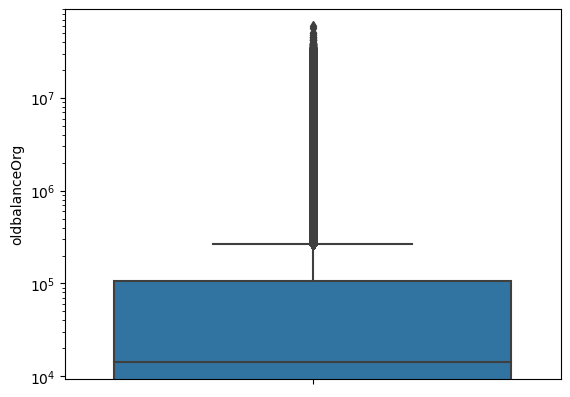

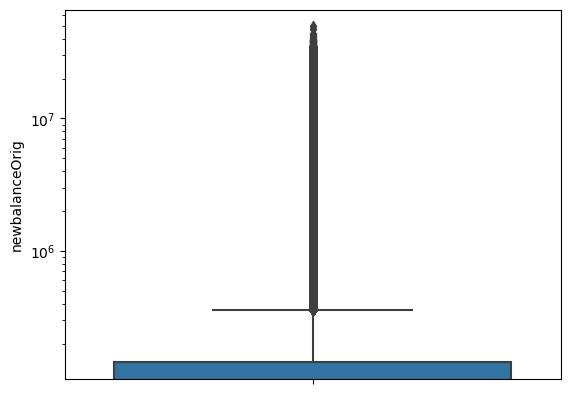

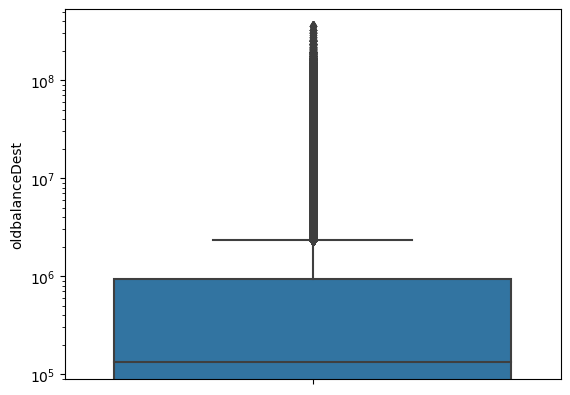

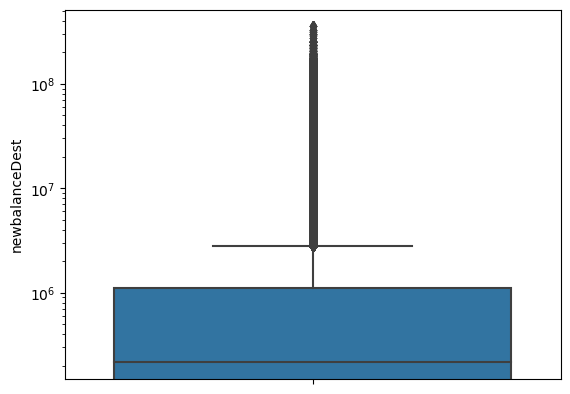

In [123]:
for i in df.columns[:-2]:
    if df[i].dtype!="O":
        sns.boxplot(y = df[i])
        plt.yscale("log")
        plt.show()

#### As we can see from boxplot there aree many outliers

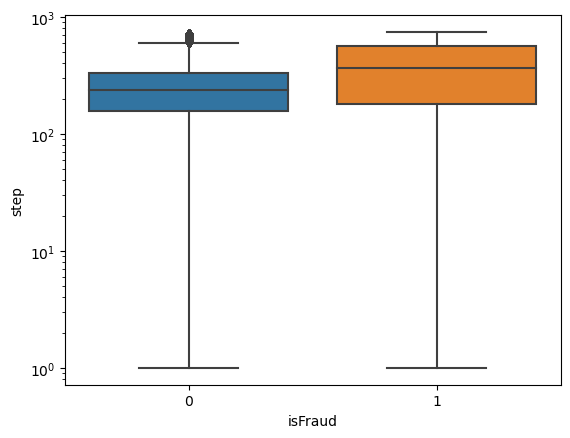

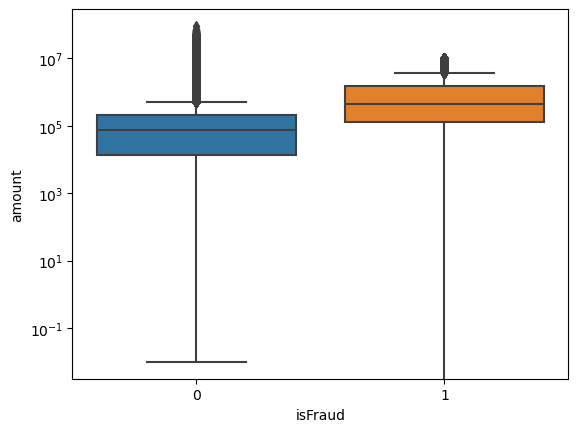

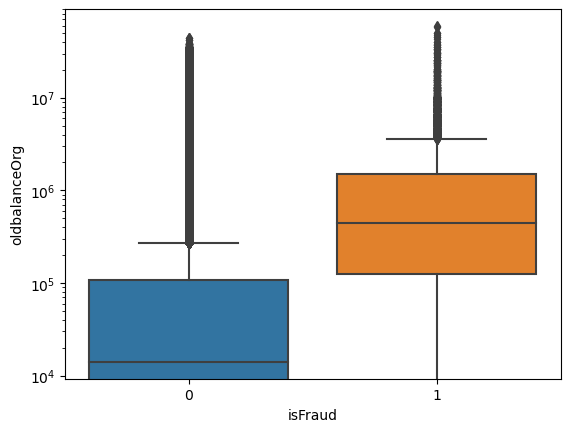

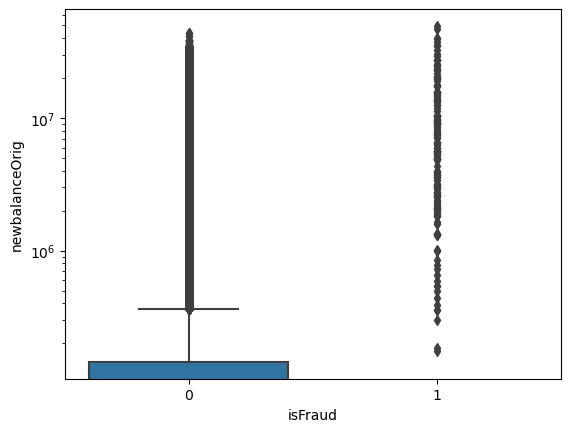

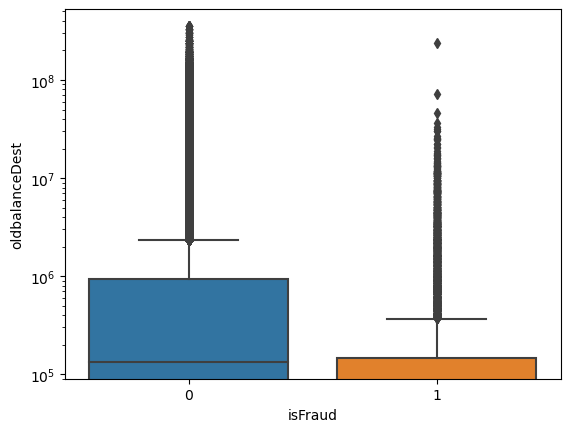

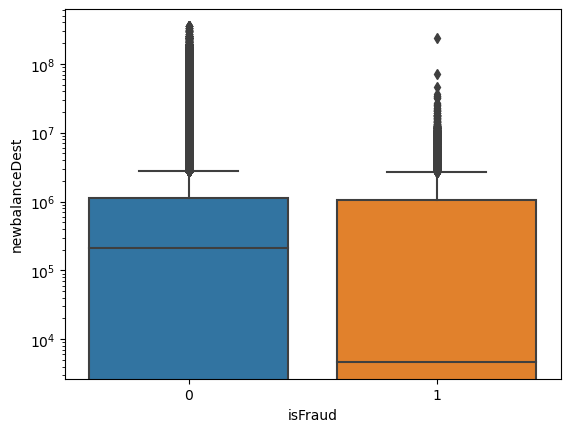

In [124]:
for i in df.columns[:-2]:
    if df[i].dtype!="O":
        sns.boxplot(y = df[i], x = df["isFraud"])
        plt.yscale("log")
        plt.show()

#### As we can see from the box plots all the the columns have significant variations and have some effect on the output.

In [ ]:
### Plotting count plot for type columne with isFraud as refarence.

Text(0, 0.5, 'Amount')

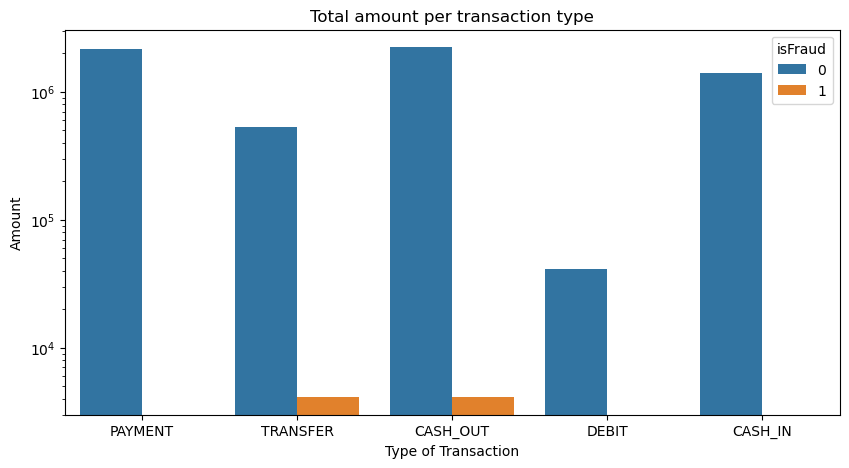

In [125]:
plt.figure(figsize=(10,5))
sns.countplot( x=df['type'],hue=df['isFraud'])
plt.yscale('log')
plt.title("Total amount per transaction type")
plt.xlabel("Type of Transaction")
plt.ylabel("Amount")

#### As we see in the barplot above most of the fraud cases are observed in TRANSFER and CASH_OUT Transaction. 

### LABEL ENCODING

In [126]:
# listing out Attribute columns.     
l1 = [x for x in df.columns if df[x].dtype=="O"]
print("l1 = ",l1)
for i in l1:
    print(df[i].unique())
    print()
    print(len(df[i].unique()))
    print()

l1 =  ['type', 'nameOrig', 'nameDest']
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

5

['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']

6353307

['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']

2722362



In [127]:
from sklearn.preprocessing import LabelEncoder

df_cat = df[l1]
df_cat = df_cat.apply(LabelEncoder().fit_transform)
df = pd.concat([df.drop(l1,axis =1),df_cat],axis =1)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,3,757869,1662094
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3,2188998,1733924
2,1,181.00,181.0,0.00,0.0,0.0,1,0,4,1002156,439685
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,5828262,391696
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3,3445981,828919


### Checking for MULTICOLINEARITY

In [128]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(df.columns)):
    print(df.columns[i]," = ",vif(df.values,i))

step  =  2.7916101262000708
amount  =  4.149312172115945
oldbalanceOrg  =  576.8037768203981
newbalanceOrig  =  582.709128207047
oldbalanceDest  =  73.34993661263384
newbalanceDest  =  85.00561377409618
isFraud  =  1.1953046040620106
isFlaggedFraud  =  1.002587166290939
type  =  4.467404733109234
nameOrig  =  2.7642336418126576
nameDest  =  3.3009745688010272


#### We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

### PCA
#### Thus combine these pairs of collinear attributes and drop the individual ones.

In [129]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

In [130]:
# Checking VIF again
for i in range(len(df.columns)):
    print(df.columns[i]," = ",vif(df.values,i))

amount  =  3.8189015076841963
isFraud  =  1.184478989933181
isFlaggedFraud  =  1.0025456647903022
type  =  2.6878028770997875
Actual_amount_orig  =  1.307910391959041
Actual_amount_dest  =  3.7543352753136996
TransactionPath  =  2.6771673220165315


### CORRELATION HEATMAP

<Axes: >

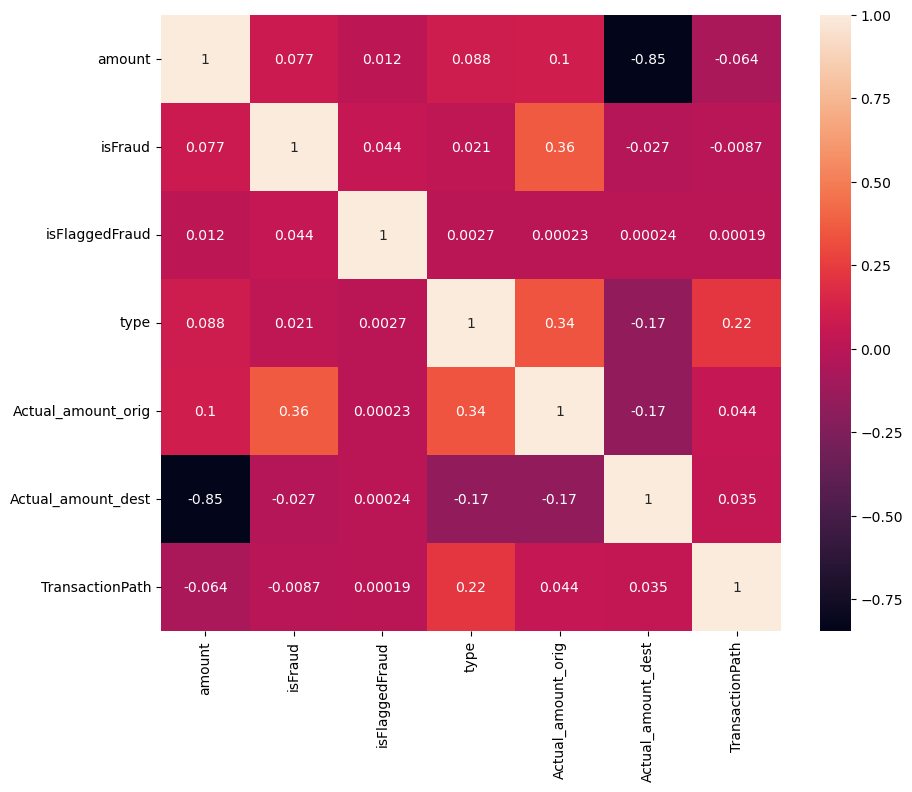

In [131]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# MODEL BUILDING

### Scaling

In [132]:
# Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df["NormalizedAmount"] = sc.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

y = df["isFraud"]
x = df.drop(["isFraud"], axis= 1)

### Train and Test Split

In [133]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
                                        df.drop("isFraud",axis = 1),
                                        df["isFraud"],
                                        test_size=0.25,
                                        random_state=0)

## Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
mod1 = logr.fit(x_train,y_train)
y_pred_1 = mod1.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
print(confusion_matrix(y_pred_1,y_test))
print()
print("accuracy_score")
print(accuracy_score(y_pred_1,y_test))
print()
print("classification_report")
print(classification_report(y_pred_1,y_test))
print()

confusion_matrix
[[1587298    1354]
 [   1330     673]]

accuracy_score
0.9983126447909824

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588652
           1       0.33      0.34      0.33      2003

    accuracy                           1.00   1590655
   macro avg       0.67      0.67      0.67   1590655
weighted avg       1.00      1.00      1.00   1590655




## KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=5)
mod2 = knnc.fit(x_train,y_train)
y_pred_2 = mod2.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
print(confusion_matrix(y_pred_2,y_test))
print()
print("accuracy_score")
print(accuracy_score(y_pred_2,y_test))
print()
print("classification_report")
print(classification_report(y_pred_2,y_test))
print()

confusion_matrix
[[1588384    1008]
 [    244    1019]]

accuracy_score
0.9992129028607712

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1589392
           1       0.50      0.81      0.62      1263

    accuracy                           1.00   1590655
   macro avg       0.75      0.90      0.81   1590655
weighted avg       1.00      1.00      1.00   1590655




### Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
mod3 = model.fit(x_train,y_train)
y_pred_3 = mod3.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
print(confusion_matrix(y_pred_3,y_test))
print()
print("accuracy_score")
print(accuracy_score(y_pred_3,y_test))
print()
print("classification_report")
print(classification_report(y_pred_3,y_test))
print()

confusion_matrix
[[1577976    1054]
 [  10652     973]]

accuracy_score
0.9926407674825779

classification_report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1579030
           1       0.48      0.08      0.14     11625

    accuracy                           0.99   1590655
   macro avg       0.74      0.54      0.57   1590655
weighted avg       0.99      0.99      0.99   1590655




### Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
mod4 = dt.fit(x_train,y_train)
y_pred_4 = mod4.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
print(confusion_matrix(y_pred_4,y_test))
print()
print("accuracy_score")
print(accuracy_score(y_pred_4,y_test))
print()
print("classification_report")
print(classification_report(y_pred_4,y_test))
print()

confusion_matrix
[[1588013     555]
 [    615    1472]]

accuracy_score
0.9992644539513597

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588568
           1       0.73      0.71      0.72      2087

    accuracy                           1.00   1590655
   macro avg       0.86      0.85      0.86   1590655
weighted avg       1.00      1.00      1.00   1590655




### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
mod5 = rf.fit(x_train,y_train)
y_pred_5 = mod5.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
print(confusion_matrix(y_pred_5,y_test))
print()
print("accuracy_score")
print(accuracy_score(y_pred_5,y_test))
print()
print("classification_report")
print(classification_report(y_pred_5,y_test))
print()

confusion_matrix
[[1588413     593]
 [    215    1434]]

accuracy_score
0.9994920331561526

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1589006
           1       0.71      0.87      0.78      1649

    accuracy                           1.00   1590655
   macro avg       0.85      0.93      0.89   1590655
weighted avg       1.00      1.00      1.00   1590655




### SVM

In [139]:
'''from sklearn.svm import SVC 
svm = SVC(kernel="rbf") # rbf (default,rbf,)
mod6 = svm.fit(x_train,y_train)
y_pred_6 = mod6.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
print(confusion_matrix(y_pred_6,y_test))
print()
print("accuracy_score")
print(accuracy_score(y_pred_6,y_test))
print()
print("classification_report")
print(classification_report(y_pred_6,y_test))
print()'''

'from sklearn.svm import SVC \nsvm = SVC(kernel="rbf") # rbf (default,rbf,)\nmod6 = svm.fit(x_train,y_train)\ny_pred_6 = mod6.predict(x_test)\n\nfrom sklearn.metrics import classification_report,confusion_matrix,accuracy_score\nprint("confusion_matrix")\nprint(confusion_matrix(y_pred_6,y_test))\nprint()\nprint("accuracy_score")\nprint(accuracy_score(y_pred_6,y_test))\nprint()\nprint("classification_report")\nprint(classification_report(y_pred_6,y_test))\nprint()'

In [140]:
#### We can build SVM model but due to 

# EVALUATION

In [141]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
l1 = ["logit","KNN","NB","DT","RF"]

acu = [accuracy_score(y_pred_1,y_test),accuracy_score(y_pred_2,y_test),accuracy_score(y_pred_3,y_test),
       accuracy_score(y_pred_4,y_test),accuracy_score(y_pred_5,y_test)]

pre = [precision_score(y_pred_1,y_test),precision_score(y_pred_2,y_test),precision_score(y_pred_3,y_test),
       precision_score(y_pred_4,y_test),precision_score(y_pred_5,y_test)]

recl = [recall_score(y_pred_1,y_test),recall_score(y_pred_2,y_test),recall_score(y_pred_3,y_test),
       recall_score(y_pred_4,y_test),recall_score(y_pred_5,y_test)]

f1 = [f1_score(y_pred_1,y_test),f1_score(y_pred_2,y_test),f1_score(y_pred_3,y_test),
       f1_score(y_pred_4,y_test),f1_score(y_pred_5,y_test)]

<BarContainer object of 5 artists>

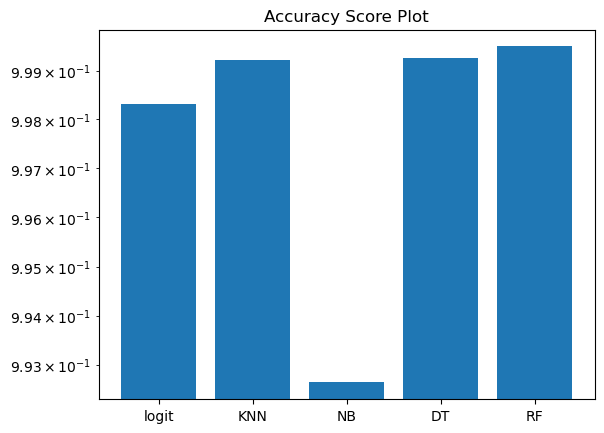

In [142]:
plt.title("Accuracy Score Plot")
plt.yscale("log")
plt.bar(l1,acu)

### As we can see in the above plot Random Forest has the highest accuracy. but as the give data is highly imbalanced we do not just consider Accuracy of the model we will check the precision, recall, f1 score.

<BarContainer object of 5 artists>

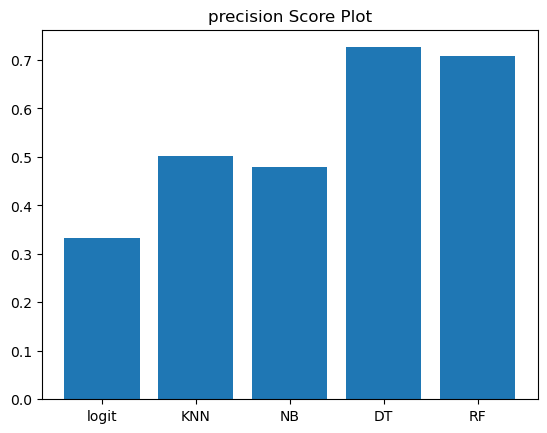

In [143]:
plt.title("precision Score Plot")
plt.bar(l1,pre)

### As we can see in the above plot Random Forest and Decision Tree has the highest precision score.

<BarContainer object of 5 artists>

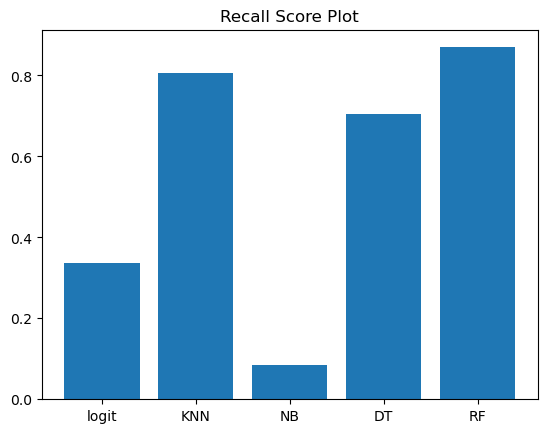

In [144]:
plt.title("Recall Score Plot")
plt.bar(l1,recl)

### As we can see in the above plot Random Forest has the highest Recall score.

<BarContainer object of 5 artists>

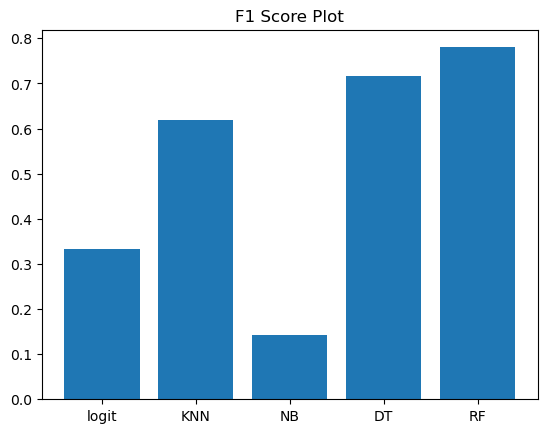

In [145]:
plt.title("F1 Score Plot")
plt.bar(l1,f1)

### As we can see in the above plot Random Forest has the highest F1 score.

### ROC Curve

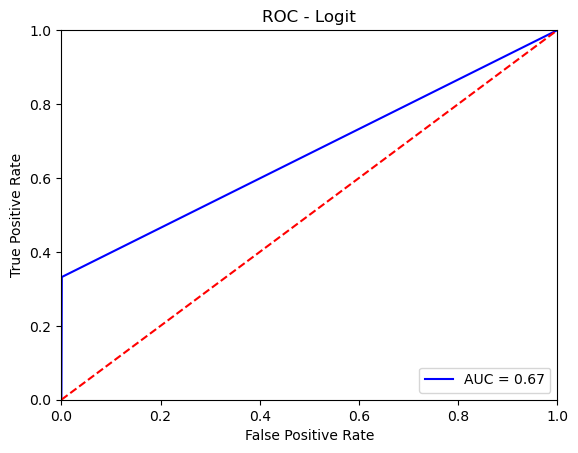

In [146]:
# AUC ROC - Logit
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Logit')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


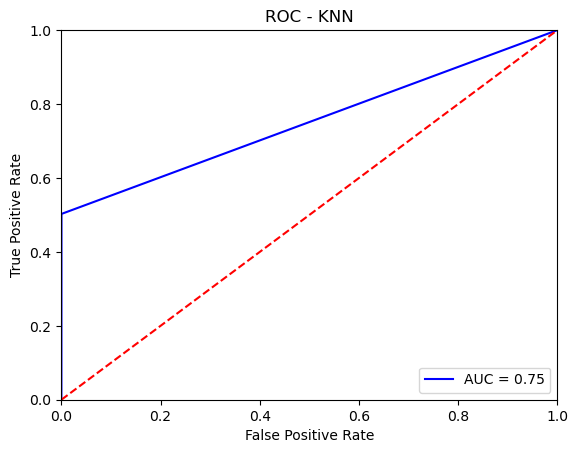

In [147]:
# AUC ROC - KNN
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

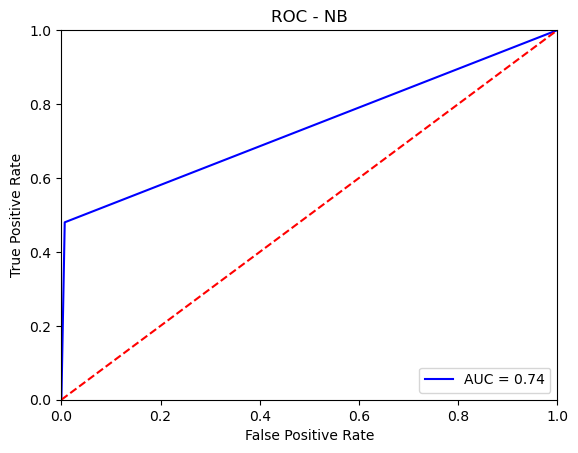

In [148]:
# AUC ROC - NB
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_3)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - NB')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

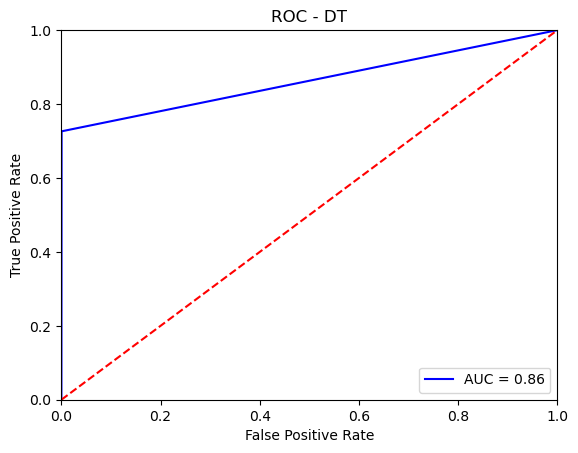

In [149]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_4)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

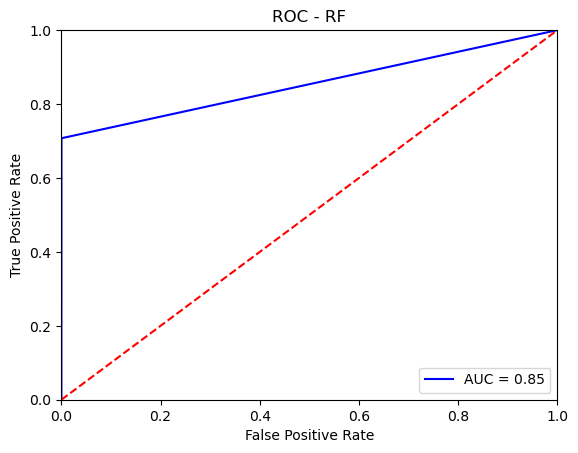

In [150]:
# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_5)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### As we see from the ruc curve Random Forest and Decision Tree gives us the highest AUC values which is more preferred.

# CONCLUSION

### We have seen that accuracy of all the models are close to each other , although Random Forest has highest accuracy. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfilled we may catch the innocent and leave the culprit.

### After comparing precision, recall, f1 score, and AUC for all the models we can conclude that Random Forest is best suited for our current problem.

### Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a Boolean way.


### Models like Logistic Regression, KNN, Naive Bayes, Decision Tree may give good accuracy but they won't give good precision, recall and f1_score values.